## **Josh Barlow**  
### **K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."**

## This project is an analysis of the IMDB movie dataset using a variety of machine learning models including Regression, Classification, and Clustering.

##  Business understanding
Predicting movie success has been attempted multiple times over the years, especially since machine computing technology has evolved to the level it is at now. Being able to predict the success of a movie can benefit everyone. The people involved in the production of the movie (producers, actors, etc) are the obvious beneficiaries but there are second and third order effects to their success. Theaters would benefit and the economy could also benefit.  
Using different forms of analysis to identify key variables that correlate with successful movies could enable the movie industry as a whole to be more successful. They could use this data to steer them toward profits.  
- The goal of this project is to identify what variables in the provided data set are correlated with a high IMDB movie rating. This could enable more accurate predictions of movie success.

## Dataset  
• Download from https://data.world/popculture/imdb-5000-movie-dataset  
• This is a very popular dataset for data analytics project at major universities. You can find the data dictionary below.  
• More information about the dataset from here.  
Variable Name - Description  
- movie_title - Title of the Movie  
- duration - Duration in minutes  
- director_name - Name of the Director of the Movie  
- director_facebook_likes - Number of likes of the Director on his Facebook Page  
- actor_1_name - Primary actor starring in the movie  
- actor_1_facebook_likes - Number of likes of the Actor_1 on his/her Facebook Page  
- actor_2_name - Other actor starring in the movie  
- actor_2_facebook_likes - Number of likes of the Actor_2 on his/her Facebook Page  
- actor_3_name - Other actor starring in the movie  
- actor_3_facebook_likes - Number of likes of the Actor_3 on his/her Facebook Page  
- num_user_for_reviews - Number of users who gave a review  
- num_critic_for_reviews - Number of critical reviews on imdb  
- num_voted_users - Number of people who voted for the movie  
- cast_total_facebook_likes - Total number of facebook likes of the entire cast of the movie  
- movie_facebook_likes - Number of Facebook likes in the movie page  
- plot_keywords - Keywords describing the movie plot  
- facenumber_in_poster - Number of the actor who featured in the movie poster  
- color - Film colorization. ‘Black and White’ or ‘Color’  
- genres - Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’  
- title_year - The year in which the movie is released (1916:2016)  
- language - English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc  
- country - Country where the movie is produced  
- content_rating - Content rating of the movie  
- aspect_ratio - Aspect ratio the movie was made in  
- movie_imdb_link - IMDB link of the movie  
- gross - Gross earnings of the movie in Dollars  
- budget - Budget of the movie in Dollars  
- imdb_score - IMDB Score of the movie on IMDB  
Source: http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas.tools import plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Data understanding and preparation

In [2]:
#load the data
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
df = pd.read_csv("data/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

This shows that all columns are either an object, integer, or a float. It also shows that there is a lot of missing data.

In [4]:
# create a column that categorizes imdb_score from 1-4 based on it's rating
df['category'] = 1
df['category'][(df['imdb_score'] > 4) & (df['imdb_score'] <= 6)] = 2
df['category'][(df['imdb_score'] > 6) & (df['imdb_score'] <= 8)] = 3
df['category'][(df['imdb_score'] > 8)] = 4
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,category
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,3
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,3
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,3
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,4
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,3


In [5]:
# remove any unnecessary columns
df = df.drop(['color', 'director_name', 'movie_imdb_link', 'language', 'country', 'movie_title', 'title_year',
              'aspect_ratio','actor_1_name', 'actor_2_name', 'actor_3_name', 'genres', 'plot_keywords', 'genres'], axis=1)

df.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,category
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,PG-13,237000000.0,936.0,7.9,33000,3


In [6]:
df['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

There are 18 different rating categories currently. It will be very helpful to reduce this number into a more usable number.

In [7]:
#replace the content ratings in order of target audience (1 being childrens movies -> 5 being mature audience movies)
df = df.replace({'content_rating': 'G'}, {'content_rating': 1})
df = df.replace({'content_rating': 'TV-G'}, {'content_rating': 1})
df = df.replace({'content_rating': 'TV-Y'}, {'content_rating': 1})
df = df.replace({'content_rating': 'TV-Y7'}, {'content_rating': 1})
df = df.replace({'content_rating': 'PG'}, {'content_rating': 2})
df = df.replace({'content_rating': 'TV-PG'}, {'content_rating': 2})
df = df.replace({'content_rating': 'GP'}, {'content_rating': 2})
df = df.replace({'content_rating': 'PG-13'}, {'content_rating': 3})
df = df.replace({'content_rating': 'TV-14'}, {'content_rating': 3})
df = df.replace({'content_rating': 'R'}, {'content_rating': 4})
df = df.replace({'content_rating': 'TV-MA'}, {'content_rating': 4})
df = df.replace({'content_rating': 'M'}, {'content_rating': 4})
df = df.replace({'content_rating': 'NC-17'}, {'content_rating': 4})
df = df.replace({'content_rating': 'X'}, {'content_rating': 4})
df = df.replace({'content_rating': 'Unrated'}, {'content_rating': 5})
df = df.replace({'content_rating': 'Not Rated'}, {'content_rating': 5})
df = df.replace({'content_rating': 'Approved'}, {'content_rating': 5})
df = df.replace({'content_rating': 'Passed'}, {'content_rating': 5})

df['content_rating'].value_counts()

4.0    2163
3.0    1491
2.0     720
5.0     242
1.0     124
Name: content_rating, dtype: int64

Now there are only 5 content rating categories and they are ordered from childrens movies to adult movies.

In [8]:
# check data for any missing values
df.isnull().sum()

num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        884
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
content_rating               303
budget                       492
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
category                       0
dtype: int64

There are 16 columns in the dataset. Of those 16, only 5 (or 31%) of them have no missing data.

In [9]:
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3827 entries, 0 to 3826
Data columns (total 16 columns):
num_critic_for_reviews       3827 non-null float64
duration                     3827 non-null float64
director_facebook_likes      3827 non-null float64
actor_3_facebook_likes       3827 non-null float64
actor_1_facebook_likes       3827 non-null float64
gross                        3827 non-null float64
num_voted_users              3827 non-null int64
cast_total_facebook_likes    3827 non-null int64
facenumber_in_poster         3827 non-null float64
num_user_for_reviews         3827 non-null float64
content_rating               3827 non-null float64
budget                       3827 non-null float64
actor_2_facebook_likes       3827 non-null float64
imdb_score                   3827 non-null float64
movie_facebook_likes         3827 non-null int64
category                     3827 non-null int64
dtypes: float64(12), int64(4)
memory usage: 478.4 KB


In [10]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,category
count,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3.827000e+03,3.827000e+03,3827.000000,3827.000000,3827.000000,3827.000000,3.827000e+03,3827.000000,3827.000000,3827.000000,3827.000000
mean,164.929971,110.013326,793.126470,762.023517,7666.114450,5.170793e+07,1.039349e+05,11398.531748,1.378626,331.211915,3.305461,4.548883e+07,1995.091717,6.459368,9212.488372,2.709694
std,123.675383,22.565976,3041.343741,1878.167542,15446.566179,6.998590e+07,1.512471e+05,19020.991563,2.041799,409.468075,0.834426,2.239737e+08,4512.387884,1.057586,21297.889412,0.583460
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,2.200000e+01,0.000000,0.000000,1.000000,1.000000,2.180000e+02,0.000000,1.600000,0.000000,1.000000
25%,75.000000,95.000000,10.000000,189.000000,738.000000,7.456858e+06,1.827850e+04,1882.500000,0.000000,105.000000,3.000000,1.000000e+07,374.000000,5.900000,0.000000,2.000000
50%,136.000000,106.000000,60.000000,433.000000,1000.000000,2.887119e+07,5.242100e+04,3962.000000,1.000000,206.000000,3.000000,2.500000e+07,677.000000,6.600000,219.000000,3.000000
75%,223.000000,120.000000,233.000000,690.000000,12500.000000,6.600608e+07,1.258640e+05,16131.500000,2.000000,394.000000,4.000000,5.000000e+07,975.000000,7.200000,11000.000000,3.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,5.000000,1.221550e+10,137000.000000,9.300000,349000.000000,4.000000


Here is a snapshot of the numerical columns providing some potentially useful initial data. For example, the average duration of a movie in this dataset is 110 minutes.

In [11]:
# (personal preference) move imdb_score column to the first postion
front = df['imdb_score']
df.drop(labels=['imdb_score'], axis=1,inplace = True)
df.insert(0, 'imdb_score', front)
df.head(1)

,imdb_score,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes,category
0,7.9,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,3.0,237000000.0,936.0,33000,3


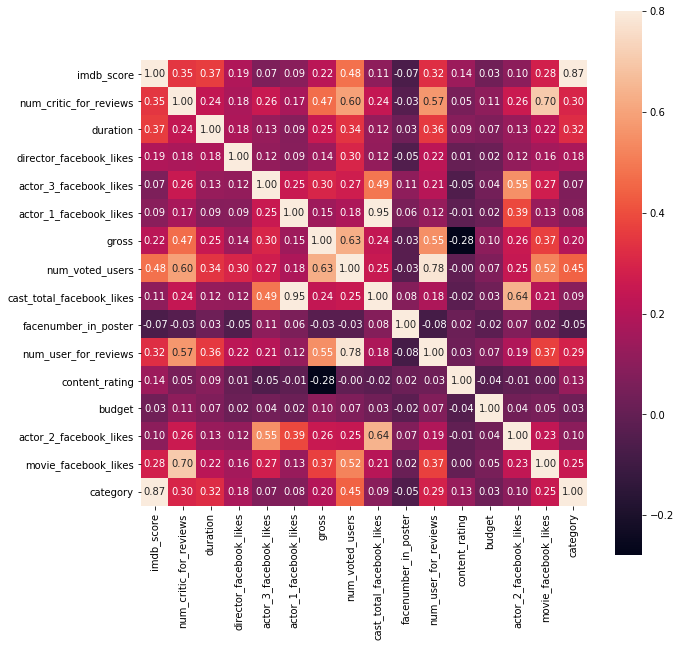

In [12]:
# correlation plot
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".2f")

We can see here down the left column that imdb_score has the highest correlation with num_voted_users, duration, num_critic_for_reviews, and num_users_for_reviews. We'll see if this shows up in the analysis later.

In [14]:
# correlation 
corr = pd.DataFrame(df.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
category,0.871398
num_voted_users,0.479197
duration,0.365548
num_critic_for_reviews,0.347535
num_user_for_reviews,0.324157
movie_facebook_likes,0.280124
gross,0.215441
director_facebook_likes,0.191539
content_rating,0.140743
cast_total_facebook_likes,0.107224


Here is another view that may be easier to read (shows same info as first column in table but sorted).

# Regression
• Build regression models using different regression algorithms. The Y value is imdb_score. It is important you use important features in your models.  
• Evaluate the models  
• (Optional for extra points) Scrape some new data (scoring dataset) from the website and deploy your best model and predict imdb_score for the movies in the scoring dataset).

In [15]:
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [16]:
# drop category column so there aren't two columns telling us basically the same thing
df_reg = df.drop(['category'], axis=1)
df_reg.head(1)

,imdb_score,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes
0,7.9,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,3.0,237000000.0,936.0,33000


In [17]:
#assigning columns to X and Y variables
y = df_reg['imdb_score'] 
X = df_reg.drop(['imdb_score'], axis=1)

model = lm.LinearRegression()
model.fit(X, y)   
model_y = model.predict(X)

coef = ["%.3f" % i for i in model.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.001'),
 ('duration', '0.012'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.033'),
 ('num_user_for_reviews', '-0.001'),
 ('content_rating', '0.115'),
 ('budget', '-0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000')]

In [18]:
print "mean square error: ", mean_squared_error(y, model_y)
print "variance or r-squared: ", explained_variance_score(y, model_y)

mean square error:  0.7432233888333752
variance or r-squared:  0.3353364196576435


Here we see that a simple linear regression model with all variables only has an r-squared of 33.5%. That isn't very good.

In [19]:
val_reg_model = ols("imdb_score~num_critic_for_reviews+duration+director_facebook_likes+actor_3_facebook_likes \
                    +actor_1_facebook_likes+gross+num_voted_users+cast_total_facebook_likes+facenumber_in_poster \
                    +num_user_for_reviews+content_rating+budget+actor_2_facebook_likes+movie_facebook_likes",df_reg)
val_reg = val_reg_model.fit()
print val_reg.summary()

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     137.4
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:47:14   Log-Likelihood:                -4862.4
No. Observations:                3827   AIC:                             9755.
Df Residuals:                    3812   BIC:                             9849.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [20]:
val_reg.mse_resid

0.7461479299751645

Here we see the same results but in a nice table.

In [21]:
#assigning columns to X and Y variables
y  = df_reg['imdb_score'] 
X2 = df_reg[['num_voted_users', 'budget', 'duration', 'num_user_for_reviews', 'gross']]

model2 = lm.LinearRegression()
model2.fit(X2, y)   
model2_y = model2.predict(X2)

print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)

mean square error:  0.7828083284789144
variance or r-squared:  0.29993566652238557


Running the first model with only 5 variables has a lower r-squared but not significantly lower considering we are using less than half as many variables.

### Lasso Regression

In [22]:
#Fit the lasso model

y = df_reg['imdb_score'] 
X = df_reg.drop(['imdb_score'], axis=1)

lasso_model = lm.Lasso(alpha=0.1)   #higher alpha (penality parameter), fewer predictors
lasso_model.fit(X, y)
lasso_model_y = lasso_model.predict(X)

In [23]:
coef = ["%.3f" % i for i in lasso_model.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.012'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.007'),
 ('num_user_for_reviews', '-0.001'),
 ('content_rating', '0.000'),
 ('budget', '-0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000')]

In [24]:
a = zip(xcolumns, coef)
df_coef = pd.DataFrame(a)
df_coef.sort_values(1, ascending=False)

,0,1
1,duration,0.012
0,num_critic_for_reviews,0.002
2,director_facebook_likes,0.000
3,actor_3_facebook_likes,0.000
4,actor_1_facebook_likes,0.000
6,num_voted_users,0.000
10,content_rating,0.000
12,actor_2_facebook_likes,0.000
8,facenumber_in_poster,-0.007
9,num_user_for_reviews,-0.001


In [25]:
print "mean square error: ", mean_squared_error(y, lasso_model_y)
print "variance or r-squared: ", explained_variance_score(y, lasso_model_y)

mean square error:  0.7534865501547657
variance or r-squared:  0.32615808962659565


Running all of the variables through a lasso model did not give any better results. Here we have an r-squared of 32.6%.

#### Lasso model with only 4 variables

In [26]:
y = df_reg['imdb_score'] 
X = df_reg[['duration', 'num_critic_for_reviews', 'num_user_for_reviews', 'gross']]

lasso_model2 = lm.Lasso(alpha=0.1)   #higher alpha (penality parameter), fewer predictors
lasso_model2.fit(X, y)
lasso_model2_y = lasso_model2.predict(X)

coef = ["%.3f" % i for i in lasso_model2.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('duration', '0.013'),
 ('num_critic_for_reviews', '0.002'),
 ('num_user_for_reviews', '0.000'),
 ('gross', '-0.000')]

In [27]:
a = zip(xcolumns, coef)
df_coef = pd.DataFrame(a)
df_coef.sort_values(1, ascending=False)

,0,1
0,duration,0.013
1,num_critic_for_reviews,0.002
2,num_user_for_reviews,0.000
3,gross,-0.000


In [28]:
print "mean square error: ", mean_squared_error(y, lasso_model2_y)
print "variance or r-squared: ", explained_variance_score(y, lasso_model2_y)

mean square error:  0.8812473084715687
variance or r-squared:  0.2119018319173287


We can see that reducing the number of variables made the model worse.

### Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#assigning columns to X and Y variables
y = df_reg['imdb_score'] 
X = df_reg.drop(['imdb_score'], axis=1)

regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


mean square error:  0.09238468774496995
variance or r-squared:  0.9176003304707357


As expected, the random forest model gave us an r-squared of 91.8% which is great (especially for this dataset).

In [30]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.018534669347520925, 'facenumber_in_poster'),
 (0.02494949609914863, 'content_rating'),
 (0.026251741188190958, 'actor_1_facebook_likes'),
 (0.029262963092614946, 'actor_2_facebook_likes'),
 (0.03288049400305822, 'cast_total_facebook_likes'),
 (0.03398995030465056, 'movie_facebook_likes'),
 (0.03412901368656833, 'director_facebook_likes'),
 (0.04050873480896961, 'actor_3_facebook_likes'),
 (0.05213015344641429, 'num_critic_for_reviews'),
 (0.06984777995762012, 'gross'),
 (0.07129167868296415, 'num_user_for_reviews'),
 (0.11852579062111893, 'duration'),
 (0.11897757074323143, 'budget'),
 (0.3287199640179288, 'num_voted_users')]

#### Visual Comparison

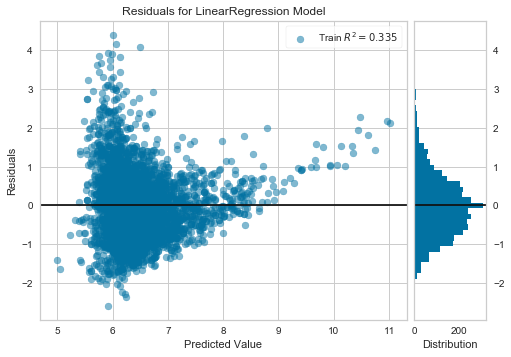

In [31]:
from yellowbrick.regressor import ResidualsPlot

y = df_reg['imdb_score'] 
X = df_reg.drop(['imdb_score'], axis=1)

# Instantiate the linear model and visualizer
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X, y)  # Fit the training data to the model
visualizer.poof()                 # Draw/show/poof the data

Our first model with r-squared of 33.5%. We can see that majority of the movies are in the 6-7 imdb score range.

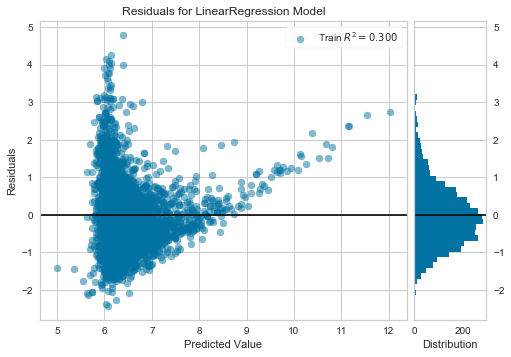

In [32]:
from yellowbrick.regressor import ResidualsPlot

y = df_reg['imdb_score'] 
X2 = df_reg[['num_voted_users', 'budget', 'duration', 'num_user_for_reviews', 'gross']]

# Instantiate the linear model and visualizer
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X2, y)  # Fit the training data to the model
visualizer.poof()                 # Draw/show/poof the data

The same regression method with less variables. The plot has basically the same shape.

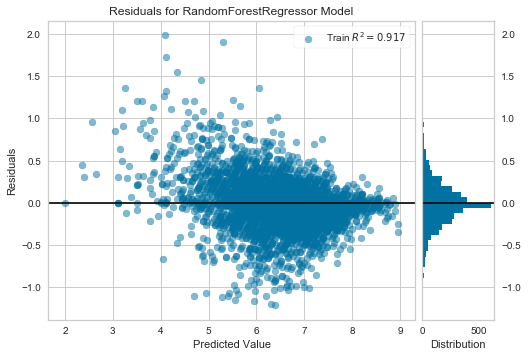

In [33]:
from yellowbrick.regressor import ResidualsPlot

y = df_reg['imdb_score'] 
X = df_reg.drop(['imdb_score'], axis=1)

# Instantiate the linear model and visualizer
regre = RandomForestRegressor(random_state=0)
visualizer = ResidualsPlot(regre)

visualizer.fit(X, y)  # Fit the training data to the model
visualizer.poof()                 # Draw/show/poof the data

Random forest model using all variables. You can see it is concentrated a lot better than the previous models meaning there is less error.

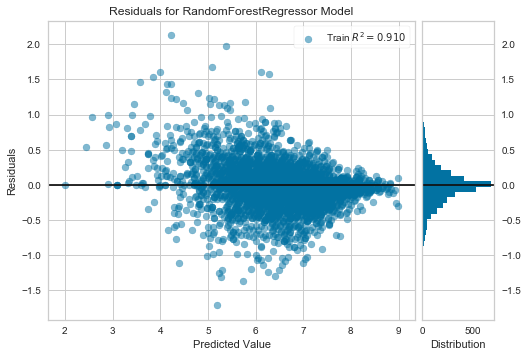

In [34]:
from yellowbrick.regressor import ResidualsPlot

y = df_reg['imdb_score'] 
X2 = df_reg[['num_voted_users', 'budget', 'duration', 'num_user_for_reviews', 'gross']]

# Instantiate the linear model and visualizer
regre = RandomForestRegressor(random_state=0)
visualizer = ResidualsPlot(regre)

visualizer.fit(X2, y)
visualizer.poof()

And finally, the random forest model with only 5 variables. It has the same shape as the previous random forest model and the r-squared only went down by 0.7% to 91%.

# Classification
• The goal is to build a classification model to predict if a movie is good or bad. You need to create a new “categorical” column from imdb_score in order to build classification models. Create the column by “binning” the imdb_score into 4 categories (or buckets): “less than 4, 4~6, 6~8 and 8~10, which represents bad, OK, good and excellent respectively”1.  
• It is important that you use different classification algorithms we have learned and evaluate model quality.  
• (Optional for extra points) Deploy your best classification model and predict if each movie (in the scoring dataset) is bad, OK, good or excellent.

In [35]:
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import RandomForestClassifier

In [36]:
df.head(1)

,imdb_score,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes,category
0,7.9,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,3.0,237000000.0,936.0,33000,3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3827 entries, 0 to 3826
Data columns (total 16 columns):
imdb_score                   3827 non-null float64
num_critic_for_reviews       3827 non-null float64
duration                     3827 non-null float64
director_facebook_likes      3827 non-null float64
actor_3_facebook_likes       3827 non-null float64
actor_1_facebook_likes       3827 non-null float64
gross                        3827 non-null float64
num_voted_users              3827 non-null int64
cast_total_facebook_likes    3827 non-null int64
facenumber_in_poster         3827 non-null float64
num_user_for_reviews         3827 non-null float64
content_rating               3827 non-null float64
budget                       3827 non-null float64
actor_2_facebook_likes       3827 non-null float64
movie_facebook_likes         3827 non-null int64
category                     3827 non-null int64
dtypes: float64(12), int64(4)
memory usage: 478.4 KB


In [38]:
df_class = df.astype(int)
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3827 entries, 0 to 3826
Data columns (total 16 columns):
imdb_score                   3827 non-null int32
num_critic_for_reviews       3827 non-null int32
duration                     3827 non-null int32
director_facebook_likes      3827 non-null int32
actor_3_facebook_likes       3827 non-null int32
actor_1_facebook_likes       3827 non-null int32
gross                        3827 non-null int32
num_voted_users              3827 non-null int32
cast_total_facebook_likes    3827 non-null int32
facenumber_in_poster         3827 non-null int32
num_user_for_reviews         3827 non-null int32
content_rating               3827 non-null int32
budget                       3827 non-null int32
actor_2_facebook_likes       3827 non-null int32
movie_facebook_likes         3827 non-null int32
category                     3827 non-null int32
dtypes: int32(16)
memory usage: 239.3 KB


We converted to integers for the classification models.

In [39]:
df_class.groupby(['category']).size()

category
1      97
2    1077
3    2493
4     160
dtype: int64

We can see here that there are:
- 97 movies with an IMDB score <= 4
- 1077 movies with a score >4 and <= 6
- 2493 movies with a score >6 and <= 8
- 160 movies with a score >8

### Decision Tree Classification

In [40]:
y = df_class['category'] 
X = df_class.drop(['imdb_score', 'category'], axis=1)

# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()
# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
print len(X_train)
print len(y_train)
print len(X_test) 
print len(y_test)

2678
2678
1149
1149


Here we can see the breakdown of the training and test sets.

In [42]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))

0.6884247171453438
--------------------------------------------------------
[[  3  14   9   0]
 [ 14 173 148   0]
 [ 15 131 582  12]
 [  0   0  15  33]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.09      0.12      0.10        26
          2       0.54      0.52      0.53       335
          3       0.77      0.79      0.78       740
          4       0.73      0.69      0.71        48

avg / total       0.69      0.69      0.69      1149



Here we see:
- 3 movies in the bad category were correctly classified  
    - 23 movies were incorrectly classified as bad
- 173 movies in the ok category were correctly classified
    - 162 movies were incorrectly classified as ok
- 582 movies in the good category were correctly classified
    - 158 movies were incorrectly classified as good
- 33 movies in the excellent category were correctly classified
    - 15 movies were incorrectly classified as excellent (they were actually in the good category so it's close)

This means that:
- 11.5% of the bad movies were correctly classified
- 52% of the ok movies were correctly classified
- 79% of the good movies were correctly classified
- 69% of the excellent movies were correctly classified

### Overall, this means that 68.8% of the movies were correctly classified from the test set. (we can see this in our output above)

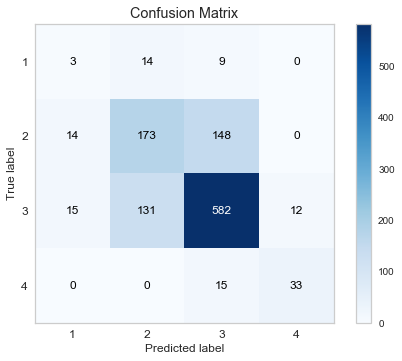

In [43]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

This chart shows the same information, it is just a little easier to read.

In [44]:
# Decision tree display
tree.export_graphviz(dt, out_file='data/moviedecisiontree.dot', feature_names=X.columns)

In [45]:
from IPython.display import Image
Image("data/moviedecisiontree.png")
# This is a "full-grown" tree 

Here is a display of the decision tree that was generated. Ovbiously it is impossible to read like this but you can see just how big it is.

In [46]:
from IPython.display import IFrame
IFrame('data/moviedecisiontree.png', width=1000, height=1000)

This visual is a little more user friendly

### KNN Classification

In [47]:
#declare X variables and y variable
y = df_class['category'] 
X = df_class.drop(['imdb_score', 'category'], axis=1)

# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize KNeighborsClassifier() and train a KNN Model
#knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=3) #don't have to have stuff in brackets, can be blank

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [48]:
#Model evaluation without valdation

# Find out the performance of this model & interpret the results
print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
#print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.5822454308093995
--------------------------------------------------------
[[  0   9  17   0]
 [ 16 116 202   1]
 [ 15 172 547   6]
 [  0   4  38   6]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        26
          2       0.39      0.35      0.36       335
          3       0.68      0.74      0.71       740
          4       0.46      0.12      0.20        48

avg / total       0.57      0.58      0.57      1149

--------------------------------------------------------


I'm not going to break this one down by score category but we can see that this model is worse at 58.2%.

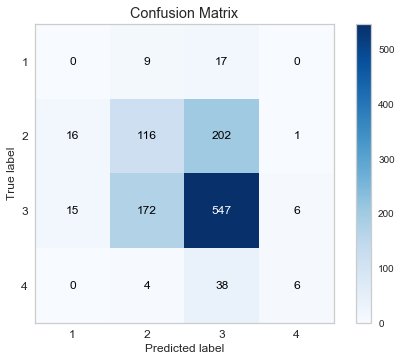

In [49]:
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=knn.predict(X_test))
plt.show()

### Logistic Regression Classification

In [50]:
#declare X variables and y variable
y = df_class['category'] 
X = df_class.drop(['imdb_score', 'category'], axis=1)

# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LogisticRegression(multi_class='multinomial', solver ='newton-cg', max_iter=1000)

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
#Model evaluation

# Find out the performance of this model
print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))

0.6866840731070496
--------------------------------------------------------
[[  0   9  17   0]
 [  0  66 269   0]
 [  1  35 697   7]
 [  0   0  22  26]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        26
          2       0.60      0.20      0.30       335
          3       0.69      0.94      0.80       740
          4       0.79      0.54      0.64        48

avg / total       0.65      0.69      0.63      1149



We can see that this model was slightle less accurate at 68.7%. Looking at where the differences were from the decision tree model:
- 0 movies were correctly classified as bad
    - 1 movie was incorrectly classified
- 66 movies were correctly classified as ok
    - 269 movies were incorrectly classified
- 697 movies were correctly classified as good
    - 43 movies were incorrectly classified
- 26 movies were correctly classified as excellent
    - 22 movies were incorrectly classified

This means that:
- 0% of the bad movies were correctly classified
- 19.7% of the ok movies were correctly classified
- 94.2% of the good movies were correctly classified
- 54.2% of the excellent movies were correctly classified

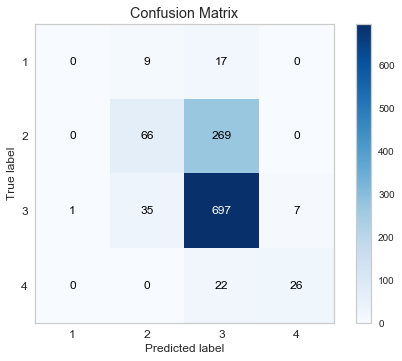

In [52]:
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=lr.predict(X_test))
plt.show()

### 10-Fold Cross-Validation

In [53]:
# evaluate the logit model using 10-fold cross-validation
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.671875   0.703125   0.69010417 0.68146214 0.70496084 0.70234987
 0.67101828 0.71391076 0.66141732 0.66666667]
0.6866890040038239


Note: this took a long time to run since I increseased the max number of iterations to 1000 (default is 100))

#### We can see that the cross validation shows an accuracty in the upper 60 to lower 70 percentages. This is close to what we got in the single model.

### Random Forest Classification

In [54]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7771975630983464

In [55]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, clf.predict(X_test)) #overall accuracy
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))

0.7771975630983464
[[  2  18   6   0]
 [  1 192 142   0]
 [  0  58 676   6]
 [  0   0  25  23]]
             precision    recall  f1-score   support

          1       0.67      0.08      0.14        26
          2       0.72      0.57      0.64       335
          3       0.80      0.91      0.85       740
          4       0.79      0.48      0.60        48

avg / total       0.77      0.78      0.76      1149



Again, as expected, random forest had an accuracy of 77.7% which is much better than the previous models. Notice that all of the models had trouble classifying the bad movies and did the best in classifying the good movies.

## Model Validation

### Feature Selection SelectKBest

In [56]:
y = df['category'] 
X = df.drop(['imdb_score', 'category'], axis=1)

X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print X_new

[[7.60505847e+08 8.86204000e+05 2.37000000e+08]
 [3.09404152e+08 4.71220000e+05 3.00000000e+08]
 [2.00074175e+08 2.75868000e+05 2.45000000e+08]
 ...
 [2.04092000e+06 5.20550000e+04 7.00000000e+03]
 [4.58400000e+03 1.33800000e+03 9.00000000e+03]
 [8.52220000e+04 4.28500000e+03 1.10000000e+03]]


In [57]:
selector = SelectKBest(chi2, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print idxs_selected

[ 5  6 11]


In [58]:
X.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,3.0,237000000.0,936.0,33000


Looking at the variables, we can see that gross, num_voted_users, and budget were the top 3.

In [59]:
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"

0.6440382941688425
--------------------------------------------------------
[[  4   8  14   0]
 [ 19 155 160   1]
 [  7 169 554  10]
 [  0   1  20  27]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.13      0.15      0.14        26
          2       0.47      0.46      0.46       335
          3       0.74      0.75      0.74       740
          4       0.71      0.56      0.63        48

avg / total       0.65      0.64      0.64      1149

--------------------------------------------------------


And here we see that after using feature selection, a decision tree classifier gives us an accuracy of 64.4%

### ExtraTreesClassifier

In [60]:
y = df['category'] 
X = df.drop(['imdb_score', 'category'], axis=1)

# build ExtraTreesClassifier
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
model_extra.score(X, y)
# display the relative importance of each attribute
print(model_extra.feature_importances_)

[0.0800947  0.09401437 0.06631386 0.06401943 0.06076145 0.07008334
 0.12667962 0.05951675 0.05140916 0.07740106 0.04060701 0.08421594
 0.05850925 0.06637408]


In [61]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), model_extra.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0406, 'content_rating'), (0.0514, 'facenumber_in_poster'), (0.0585, 'actor_2_facebook_likes'), (0.0595, 'cast_total_facebook_likes'), (0.0608, 'actor_1_facebook_likes'), (0.064, 'actor_3_facebook_likes'), (0.0663, 'director_facebook_likes'), (0.0664, 'movie_facebook_likes'), (0.0701, 'gross'), (0.0774, 'num_user_for_reviews'), (0.0801, 'num_critic_for_reviews'), (0.0842, 'budget'), (0.094, 'duration'), (0.1267, 'num_voted_users')]


This shows that according to the ExtraTreesClassifier, num_voted_users, duration, and budget are the most important variables.

## Clustering
• Analyze the data using K-means algorithm and Hierarchical clustering algorithm. You determine the optimal K value for K-means. This is exploratory data analysis and you need to report the movie “profiles” based on clustering analysis.

In [62]:
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage, ward
from scipy.spatial.distance import cdist

In [63]:
df.head(1)

,imdb_score,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes,category
0,7.9,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,3.0,237000000.0,936.0,33000,3


#### K-means Clustering

In [64]:
df_clus = df.drop(['category'], axis=1)

# variance test
df_clus.var()

imdb_score                   1.118487e+00
num_critic_for_reviews       1.529560e+04
duration                     5.092233e+02
director_facebook_likes      9.249772e+06
actor_3_facebook_likes       3.527513e+06
actor_1_facebook_likes       2.385964e+08
gross                        4.898026e+15
num_voted_users              2.287568e+10
cast_total_facebook_likes    3.617981e+08
facenumber_in_poster         4.168942e+00
num_user_for_reviews         1.676641e+05
content_rating               6.962666e-01
budget                       5.016421e+16
actor_2_facebook_likes       2.036164e+07
movie_facebook_likes         4.536001e+08
dtype: float64

In [65]:
#normalize each column and print the first 5 rows
df_norm = (df_clus - df_clus.mean()) / (df_clus.max() - df_clus.min())
df_norm.head()

,imdb_score,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes
0,0.187095,0.687278,0.232036,-0.034484,0.004042,-0.010416,0.932009,0.462952,-0.009996,-0.032061,0.538207,-0.076365,0.015678,-0.007731,0.068159
1,0.083199,0.168805,0.201320,-0.010005,0.010347,0.050522,0.338849,0.217362,0.056266,-0.032061,0.179243,-0.076365,0.020835,0.021934,-0.026397
2,0.044238,0.538264,0.129647,-0.034484,-0.026131,0.005209,0.195089,0.101751,0.000459,-0.008805,0.131012,-0.076365,0.016333,-0.011694,0.217156
3,0.265017,0.798116,0.184255,0.922038,0.966869,0.030209,0.521262,0.615717,0.145205,-0.032061,0.468430,-0.076365,0.016742,0.153320,0.443517
4,0.018264,0.365850,0.075040,-0.013832,-0.010088,-0.010978,0.028074,0.064074,-0.014504,-0.008805,0.080409,-0.076365,0.017863,-0.009950,0.042371


In [66]:
df_norm.var()

imdb_score                   0.018865
num_critic_for_reviews       0.023198
duration                     0.005932
director_facebook_likes      0.017485
actor_3_facebook_likes       0.006668
actor_1_facebook_likes       0.000583
gross                        0.008469
num_voted_users              0.008012
cast_total_facebook_likes    0.000839
facenumber_in_poster         0.002255
num_user_for_reviews         0.006551
content_rating               0.043517
budget                       0.000336
actor_2_facebook_likes       0.001085
movie_facebook_likes         0.003724
dtype: float64

In [67]:
y = df_norm['imdb_score'] 
X = df_norm.drop(['imdb_score'], axis=1)

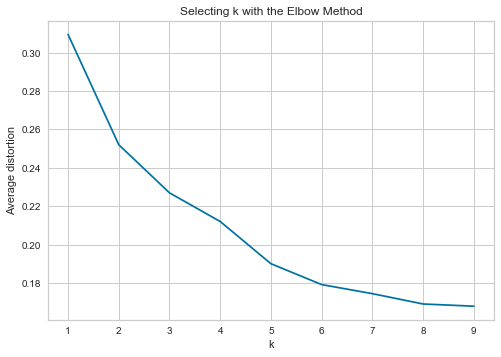

In [68]:
#The Elbow method

K = range(1, 10) 
meandistortions = [] 
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 
plt.show() 

Using the elbow method, I would probably choose to use k=3 since the line levels out a little more between 3 and 4.

In [69]:
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [70]:
k_means.cluster_centers_

array([[ 1.17567077e-01,  2.49811616e-01,  5.45263504e-02,
         1.01552977e-01,  4.89102031e-02,  9.61184752e-03,
         1.09455635e-01,  1.44505889e-01,  1.60964271e-02,
        -1.75557365e-03,  1.16622241e-01, -8.42104832e-03,
         3.09803709e-03,  1.91798412e-02,  8.48368743e-02],
       [ 6.54591303e-03, -3.54315474e-02, -5.10900338e-03,
        -1.58840177e-02, -1.13888314e-02, -1.92878794e-03,
        -3.58554673e-02, -2.48013333e-02, -3.30173446e-03,
        -1.03892541e-03, -1.81205825e-02,  1.86621714e-01,
        -8.67426941e-04, -3.36926229e-03, -1.55987771e-02],
       [-4.77189754e-02, -5.26277845e-02, -1.40812143e-02,
        -1.99309000e-02, -5.90386080e-03, -1.46598434e-03,
        -2.96408551e-03, -2.61874233e-02, -2.38413480e-03,
         1.64281275e-03, -2.30074478e-02, -1.81499774e-01,
        -2.29611201e-04, -3.39922478e-03, -1.43478870e-02]])

In [71]:
# add cluster label into the dataset as a column
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [72]:
df_clus = df_clus.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df_clus.join(df1)
df2.tail()

,imdb_score,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes,cluster
3822,7.0,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,3.0,7000.0,45.0,19000,2
3823,6.3,35.0,80.0,0.0,0.0,0.0,70071.0,589,0,0.0,35.0,5.0,7000.0,0.0,74,1
3824,6.9,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,4.0,7000.0,20.0,0,1
3825,6.4,14.0,95.0,0.0,133.0,296.0,4584.0,1338,690,1.0,14.0,5.0,9000.0,205.0,413,1
3826,6.6,43.0,90.0,16.0,16.0,86.0,85222.0,4285,163,0.0,84.0,2.0,1100.0,23.0,456,2


Displaying this allows us to verify that merging the tables did not create any null values. Now the cluster column is at the end of the table.

In [73]:
df2.groupby('cluster').mean()

,imdb_score,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes
cluster,,,,,,,,,,,,,,,
0,7.364634,367.777003,125.989547,3128.844948,1886.958188,13817.696864,1.349496e+08,348112.531359,21969.538328,1.303136,921.203833,3.271777,8.333290e+07,4622.729965,38820.557491
1,6.509771,136.159555,108.516388,427.794063,500.080396,6431.690167,2.443965e+07,62027.006184,9230.183673,1.333952,239.539889,4.051948,3.489277e+07,1533.502783,3768.515152
2,6.091932,122.196210,105.887531,334.715770,626.234719,6727.884474,4.945373e+07,59684.871638,9832.798900,1.449267,214.817237,2.579462,4.268401e+07,1529.397922,4205.075795


This allows us to build profiles based on mean values for each cluster. We will analyze it further for the summary at the end but a summary follows:  
Cluster 1:
- imdb_score: 7.36
- num_critics_for_review: 367.8
- duration: 126
- num_voted_users: 348113
- content_rating: 3.27 (close to the PG-13 range moving slightly toward R)
- budget: $83,332,900

Cluster 2:
- imdb_score: 6.51
- num_critics_for_review: 136.2
- duration: 108.5
- num_voted_users: 62027
- content_rating: 4.05 (R)
- budget: $34,892,770

Cluster 3:
- imdb_score: 6.1
- num_critics_for_review: 122.2
- duration: 105.9
- num_voted_users: 59685
- content_rating: 2.58 (between PG and PG-13)
- budget: $42,684,010

In [74]:
# Display cluster sizes
df2.groupby(['cluster']).size()

cluster
0     574
1    1617
2    1636
dtype: int64

We can see that cluster 0 is about 1/3 of cluster 1 and 2.

#### Do the same thing but this time I want to use category instead of imdb_score and see if there is a difference.

In [75]:
df_clus2 = df.drop(['imdb_score'], axis=1)

#normalize each column and print the first 5 rows

df_norm2 = (df_clus2 - df_clus2.mean()) / (df_clus2.max() - df_clus2.min())
df_norm2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes,category
0,0.687278,0.232036,-0.034484,0.004042,-0.010416,0.932009,0.462952,-0.009996,-0.032061,0.538207,-0.076365,0.015678,-0.007731,0.068159,0.096769
1,0.168805,0.201320,-0.010005,0.010347,0.050522,0.338849,0.217362,0.056266,-0.032061,0.179243,-0.076365,0.020835,0.021934,-0.026397,0.096769
2,0.538264,0.129647,-0.034484,-0.026131,0.005209,0.195089,0.101751,0.000459,-0.008805,0.131012,-0.076365,0.016333,-0.011694,0.217156,0.096769
3,0.798116,0.184255,0.922038,0.966869,0.030209,0.521262,0.615717,0.145205,-0.032061,0.468430,-0.076365,0.016742,0.153320,0.443517,0.430102
4,0.365850,0.075040,-0.013832,-0.010088,-0.010978,0.028074,0.064074,-0.014504,-0.008805,0.080409,-0.076365,0.017863,-0.009950,0.042371,0.096769


In [76]:
y = df_norm2['category'] 
X = df_norm2.drop(['category'], axis=1)

k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)
k_means.fit(df_norm2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [77]:
# add cluster label into the dataset as a column
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])

df_clus2 = df_clus2.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df3 = df_clus2.join(df1)
df3.tail(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes,category,cluster
3826,43.0,90.0,16.0,16.0,86.0,85222.0,4285,163,0.0,84.0,2.0,1100.0,23.0,456,3,1


In [78]:
df3.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes,category
cluster,,,,,,,,,,,,,,,
0,116.179092,100.813196,240.793488,654.897172,6117.771208,3.585188e+07,40060.948586,9218.015424,1.525278,211.013710,3.156812,3.765576e+07,1448.635818,3673.758355,1.916881
1,195.949287,114.402536,1097.827258,1025.849445,9370.691759,8.653595e+07,144957.791601,14150.270998,1.306656,412.623613,2.610143,6.037456e+07,2574.595087,13575.948494,3.045166
2,177.623748,113.731044,979.135193,613.288269,7419.862661,3.350412e+07,120222.354793,10734.703147,1.321173,358.057225,4.057225,3.858996e+07,1928.125179,9897.045780,3.068670


In [79]:
# Display cluster sizes
df3.groupby(['cluster']).size()

cluster
0    1167
1    1262
2    1398
dtype: int64

We can see that there is a little more even dispersion with these clusters.
Some cluster differences worth noting (all values will be mean values for that variable and cluster):  
Cluster 1:
- num_critics_for_review: 116.2
- duration: 100.8
- num_voted_users: 40061
- content_rating: 3.16 (close to the PG-13 range)
- category: 1.9 (low to ok but closer to ok)

Cluster 2:
- num_critics_for_review: 195.9
- duration: 114.4
- num_voted_users: 144958
- content_rating: 2.61 (between PG and PG-13 but closer to the PG-13 range)
- category: 3.05 (good)

Cluster 3:
- num_critics_for_review: 177.6
- duration: 113.7
- num_voted_users: 120222
- content_rating: 4.06 (rated R)
- category: 3.07 (good rating)

### Hierarchical clustering - Agglomerative Clustering

In [80]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 1, 1, 2], dtype=int64)

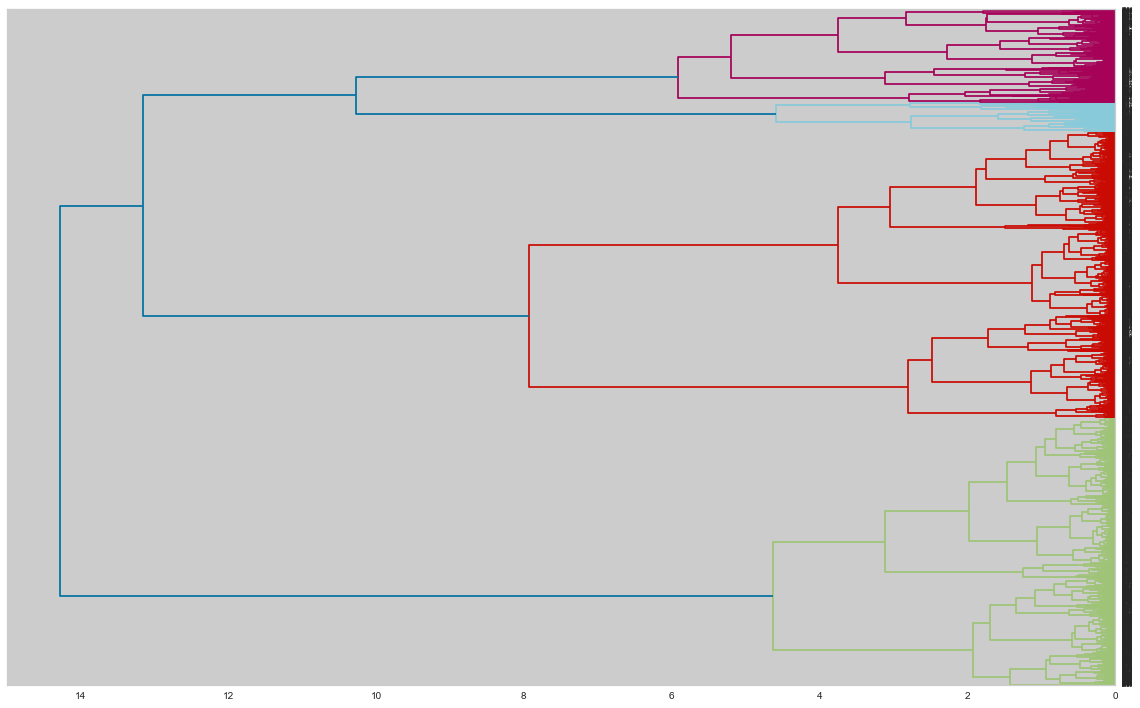

In [81]:
plt.figure(figsize=(16,10))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

Looking at this model, it appears that it may be best to use somewhere between 3 and 5 clusters.

In [82]:
# add cluster label into the dataset as a column
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [83]:
df2 = df_clus.join(df1)
df2.head()

,imdb_score,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes,cluster
0,7.9,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,3.0,237000000.0,936.0,33000,0
1,7.1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,3.0,300000000.0,5000.0,0,0
2,6.8,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,3.0,245000000.0,393.0,85000,0
3,8.5,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,3.0,250000000.0,23000.0,164000,0
4,6.6,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,3.0,263700000.0,632.0,24000,0


In [84]:
df2.groupby('cluster').mean()

,imdb_score,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes
cluster,,,,,,,,,,,,,,,
0,7.189481,335.776657,121.322767,3689.231988,2160.126801,13914.698847,1.185068e+08,297373.325648,22421.652738,1.293948,794.586455,3.301153,7.450972e+07,4689.396254,33945.329971
1,6.488111,130.758256,107.456407,157.582563,422.684280,6018.227873,2.442751e+07,58211.071995,8612.064069,1.352048,227.798547,4.054822,3.504660e+07,1421.862616,3417.685601
2,6.119518,123.650401,107.556516,146.008647,480.044472,6528.611489,4.858511e+07,63773.972205,9279.116121,1.439778,229.288450,2.606547,4.281374e+07,1376.204447,4029.498456


We can see that there is a little more even dispersion with these clusters.
Some cluster differences worth noting (all values will be mean values for that variable and cluster):  
Cluster 1:
- imdb_score: 7.19
- num_critics_for_review: 335.8
- duration: 121.3
- num_voted_users: 297373
- content_rating: 3.30 (close to the PG-13 range pushing slightly toward R)
- budget: $74,509,720

Cluster 2:
- imdb_score: 6.49
- num_critics_for_review: 130.8
- duration: 107.5
- num_voted_users: 58211
- content_rating: 4.05 (R)
- budget: $35,046,600

Cluster 3:
- imdb_score: 6.12
- num_critics_for_review: 123.7
- duration: 107.6
- num_voted_users: 63774
- content_rating: 2.61 (between PG and PG-13)
- budget: $42,813,740

In [85]:
df2.groupby('cluster').size()

cluster
0     694
1    1514
2    1619
dtype: int64

We can see that Agglomerative Clustering split two of the clusters fairly even and the other one is a little less than half the size of the others (this was fairly similar to K-means).

#### Also note that many of the variable means are close to what was found in the K-means clusters.

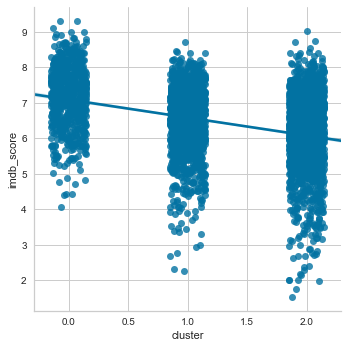

In [86]:
sns.lmplot("cluster", "imdb_score", df2, x_jitter=.15, y_jitter=.15)

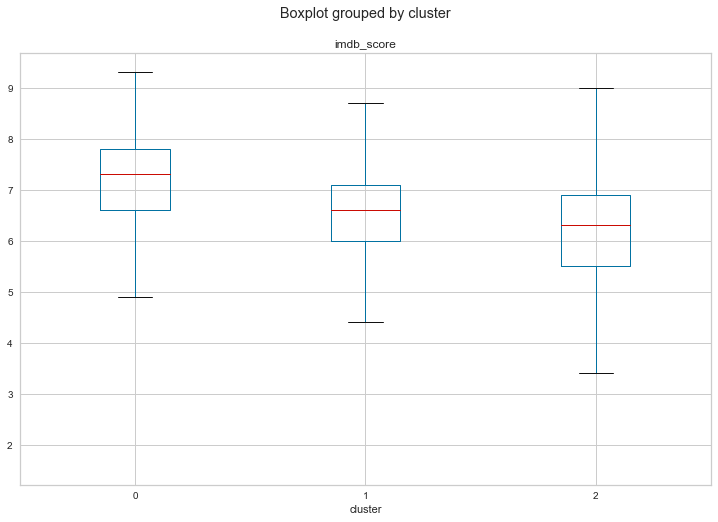

In [87]:
#create box plots to visualize content_rating and imdb_score
df2.boxplot('imdb_score', by='cluster', figsize=(12, 8))

We can see there is a noticable difference in imdb_score among the three clusters.

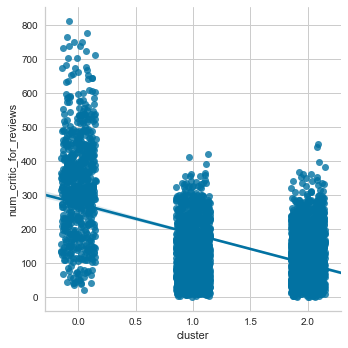

In [88]:
sns.lmplot("cluster", "num_critic_for_reviews", df2, x_jitter=.15, y_jitter=.15)

There is also a significand difference in num_critic_for_review between the clusters.

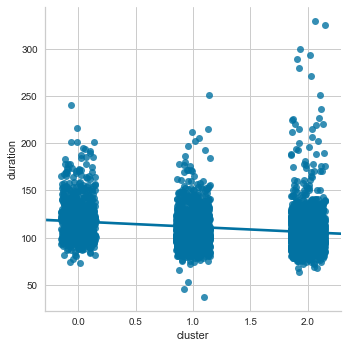

In [89]:
sns.lmplot("cluster", "duration", df2, x_jitter=.15, y_jitter=.15)

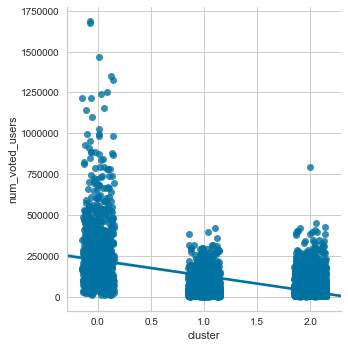

In [90]:
sns.lmplot("cluster", "num_voted_users", df2, x_jitter=.15, y_jitter=.15)

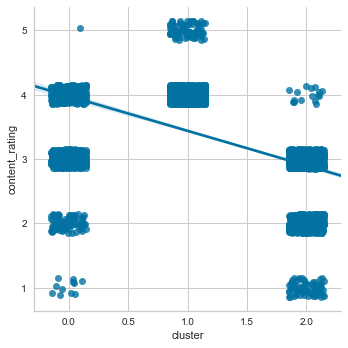

In [91]:
sns.lmplot("cluster", "content_rating", df2, x_jitter=.15, y_jitter=.15)

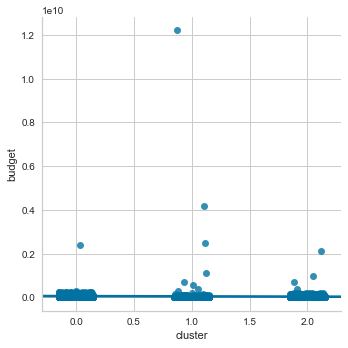

In [92]:
sns.lmplot("cluster", "budget", df2, x_jitter=.15, y_jitter=.15)

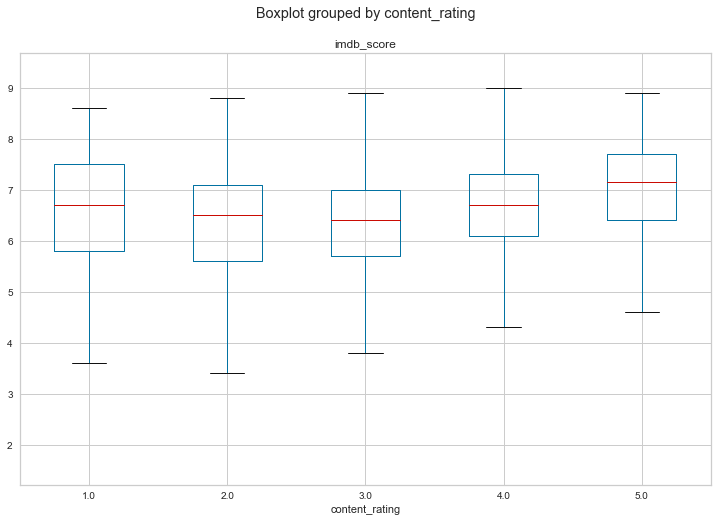

In [93]:
#create box plots to visualize content_rating and imdb_score
df2.boxplot('imdb_score', by='content_rating', figsize=(12, 8))

In [94]:
df.groupby('category').mean()

,imdb_score,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes
category,,,,,,,,,,,,,,,
1,3.294845,78.865979,95.412371,90.731959,406.938144,2894.154639,1.965568e+07,24650.041237,4888.381443,1.494845,221.082474,2.865979,2.656082e+07,666.536082,1984.443299
2,5.398700,120.229341,101.402971,253.726091,684.674095,6421.264624,3.792407e+07,41886.246982,9631.506964,1.523677,212.168059,3.184773,3.899209e+07,1523.369545,3939.929434
3,6.919976,180.348576,112.685519,864.215002,755.991576,8217.462495,5.486750e+07,106485.236262,12072.200160,1.332932,341.948255,3.366225,4.777918e+07,2164.669073,9837.559166
4,8.340625,277.756250,135.187500,3742.143750,1591.937500,10347.818750,1.146922e+08,529927.975000,16743.000000,1.043750,1032.006250,3.437500,6.500855e+07,3333.581250,39346.018750


Doing a simple groupby with the categories that we created can also provide some very useful information. I think this is very generalized information though because you can see that nearly all means increase as the imdb category increases from 1-4. The only variables that do not display this behavior are num_user_for_reviews, and facenumber_in_poster. This is why the deeper analysis that took place in this project can be more revealing.

# Storytelling
• At the end, this is what your client is interested in. Develop useful insights from your models (regression, classification, and clustering). Write a summery using bulleted lists and/or numbers in markdown cells. If this section is “too thin”, your project will receive a low grade.

Here are the results of the clusters that was also summarized above (these are the mean values for each cluster or profile):


#### K-means (using imdb_score rather han category):
Cluster 1:
- imdb_score: 7.36
- num_critics_for_review: 367.8
- duration: 126
- num_voted_users: 348113
- content_rating: 3.27 (close to the PG-13 range moving slightly toward R)
- budget: $83,332,900

Cluster 2:
- imdb_score: 6.51
- num_critics_for_review: 136.2
- duration: 108.5
- num_voted_users: 62027
- content_rating: 4.05 (R)
- budget: $34,892,770

Cluster 3:
- imdb_score: 6.1
- num_critics_for_review: 122.2
- duration: 105.9
- num_voted_users: 59685
- content_rating: 2.58 (between PG and PG-13)
- budget: $42,684,010

#### K-means (using category rather than imdb_score):  
Cluster 1:
- num_critics_for_review: 116.2
- duration: 100.8
- num_voted_users: 40061
- content_rating: 3.16 (close to the PG-13 range)
- category: 1.9 (low to ok but closer to ok)

Cluster 2:
- num_critics_for_review: 195.9
- duration: 114.4
- num_voted_users: 144958
- content_rating: 2.61 (between PG and PG-13 but closer to the PG-13 range)
- category: 3.05 (good)

Cluster 3:
- num_critics_for_review: 177.6
- duration: 113.7
- num_voted_users: 120222
- content_rating: 4.06 (rated R)
- category: 3.07 (good rating)

#### Agglomerative Clustering (using imdb_score rather than category):  
Cluster 1:
- imdb_score: 7.19
- num_critics_for_review: 335.8
- duration: 121.3
- num_voted_users: 297373
- content_rating: 3.30 (close to the PG-13 range pushing slightly toward R)
- budget: $74,509,720

Cluster 2:
- imdb_score: 6.49
- num_critics_for_review: 130.8
- duration: 107.5
- num_voted_users: 58211
- content_rating: 4.05 (R)
- budget: $35,046,600

Cluster 3:
- imdb_score: 6.12
- num_critics_for_review: 123.7
- duration: 107.6
- num_voted_users: 63774
- content_rating: 2.61 (between PG and PG-13)
- budget: $42,813,740

### Bottom Line Up Front:
Based on the cluster analysis shown above, there is evidence that potentially:
- the longer the duration of the movie, the higher the imdb_score can be
- the more critics for review, the higher the imdb_score
- content rating may affect imdb_score - movies somewhere between PG-13 and R seem to have higher ratings
- the higher the budget, the higher the imdb_score (movies in the highest rating clusters had nearly twice the budget as the other clusters)
- the higher the number of voted users, the higher the imdb score

The random forest classifier is by far the most accurate to use for classification. I was able to achieve around a 74% accuracy with it. All of the classifiers seem to have trouble differentiating the bad movies though.

Random Forest was also significantly better than the other methods for regression analysis. Using all 14 variables that I narrowed down to, I was able to get a 92.4% r-squared which is very good. This shows that it may be very possible to predict how well a movie will be rated based on these variables. Even dropping down to num_voted_users, budget, duration, num_user_for_reviews, gross, I still had a 90% r-squared.

#### Note: I did not rely very much on monetary variables in my analysis. During the previous exercise with this dataset I noticed that simply spot checking some of the movies revealed significantly inaccurate data versus what was available through open sources.